In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [11]:
from tensorflow.keras.datasets import cifar10

In [36]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

In [37]:
print(x_train.shape)
x_train=x_train.reshape(3072,50000)
x_test=x_test.reshape(3072,10000)
x_train=x_train[:,:200]
x_test=x_test[:,:50]
y_train=y_train[:200]
y_test=y_test[:50]
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(50000, 32, 32, 3)
(3072, 200) (3072, 50) (200, 1) (50, 1)


In [38]:
y_train=y_train.T
print(y_train.shape)

(1, 200)


In [39]:
x_train=x_train/255
x_test=x_test/255

In [53]:
w=np.zeros((3072,1))
b=0
costs=[]
learning_rate=0.000005
for i in range(5000):
    
    # FORWARD PROPAGATION
    a=1/(1+np.exp(-(np.dot(w.T,x_train) +b)))  
    cost= -(np.dot(y_train,(np.log(a)).T) + np.dot(1-y_train,(np.log(1-a)).T))/3072
    
    # BACKWARD PROPAGATION
    dw=np.dot(x_train,(a-y_train).T)/3072
    db=np.sum(a-y_train)/3072
    
    costs.append(cost)
    
    if(np.all(dw<0)):
        
        w=w+learning_rate*dw
    if(db<0):
        
        b=b+learning_rate*db
    elif(np.all(dw>0)):
        
        w=w-learning_rate*dw
    elif(db>0):
        
        b=b-learning_rate*db
        
    

Text(0, 0.5, 'COST')

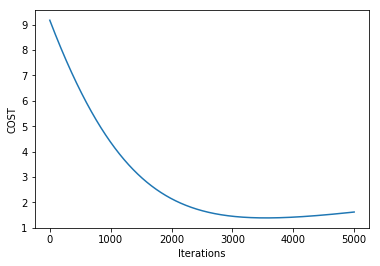

In [54]:
d={"costs": costs}
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.xlabel('Iterations')
plt.ylabel('COST')

In [57]:
print(np.min(costs))

1.3913764454353077


In [71]:
y_pred=np.zeros((1,200))
A = 1/(1+np.exp(-(np.dot(w.T,x_train)+b)))
for i in range(200):
    if(A[0][i]<=0.005):
        y_pred[0][i]=0
    else:
        y_pred[0][i]=1
    
    

In [74]:
print(y_pred)
print(np.mean(A))


[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0.]]
0.004441894159006175


In [75]:
print("train accuracy: {} %".format(100 - np.mean(np.abs(y_pred - y_train/10)) * 100))


train accuracy: 55.599999999999994 %
